# ctapipe tutorial 
Mainly based on the tutorial already shown at the ctapipe website.
This one contains a few extra functionalities that might be useful that aren't shown in
the ctapipe website tutorial. They are gathered from numerous examples shown in the ctapipe
documentation.

You can setup ctapipe using conda. ctapipe folks recommend mamba but conda worked fine for us. 

Start by importing these modules.

In [1]:
from ctapipe.io import EventSource
from ctapipe import utils
from matplotlib import pyplot as plt
import numpy as np

/home/vhep/mescob11/.conda/envs/ctapipe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Method to open a simulation file.

In [2]:
path = "simtel_files/gamma_20deg_0deg_run838___cta-prod3-sct_desert-2150m-Paranal-SCT.simtel.gz"
source = EventSource(path, focal_length_choice='EQUIVALENT', back_seekable=True)

Methods available to this class are displayed below.

In [3]:
source

allowed_tels,None,"list of allowed tel_ids, others will be ignored. If None, all telescopes in the input stream will be included (default: None)"
atmosphere_profile_choice,AtmosphereProfileKind.AUTO,"Which type of atmosphere density profile to load from the file, in case more than one exists. If set to AUTO, TABLE will be attempted first and if missing, FIVELAYER will be loaded. (default: AtmosphereProfileKind.AUTO)"
back_seekable,True,Require the event source to be backwards seekable. This will reduce in slower read speed for gzipped files and is not possible for zstd compressed files (default: False)
calib_scale,1.0,Factor to transform ADC counts into number of photoelectrons. Corrects the DC_to_PHE factor. (default: 1.0)
calib_shift,0.0,Factor to shift the R1 photoelectron samples. Can be used to simulate mis-calibration. (default: 0.0)
focal_length_choice,FocalLengthKind.EQUIVALENT,"If both nominal and effective focal lengths are available in the SimTelArray file, which one to use for the `~ctapipe.coordinates.CameraFrame` attached to the `~ctapipe.instrument.CameraGeometry` instances in the `~ctapipe.instrument.SubarrayDescription`, which will be used in CameraFrame to TelescopeFrame coordinate transforms. The 'nominal' focal length is the one used during the simulation, the 'effective' focal length is computed using specialized ray-tracing from a point light source (default: FocalLengthKind.EFFECTIVE)"
gain_selector_type,ThresholdGainSelector,"The name of a GainSelector subclass. Possible values: ['ManualGainSelector', 'ThresholdGainSelector'] (default: ThresholdGainSelector)"
input_url,/home/vhep/mescob11/sct-ctapipe-analysis-tools/simtel_files/gamma_20deg_0deg_run838___cta-prod3-sct_desert-2150m-Paranal-SCT.simtel.gz,Path to the input file containing events. (default: traitlets.Undefined)
max_events,None,Maximum number of events that will be read from the file (default: None)
skip_calibration_events,True,Skip calibration events (default: True)


You can loop over the events stored in source (simtel file) and access event information (id, energy).

In [4]:
for event in source:
    print(event.count, event.index.event_id, event.simulation.shower.energy)

0 2700 0.18786011636257172 TeV
1 4100 0.02628472074866295 TeV
2 4103 0.02628472074866295 TeV
3 5602 0.08019627630710602 TeV
4 6304 0.1343844085931778 TeV
5 6308 0.1343844085931778 TeV
6 6700 0.05100225657224655 TeV
7 6706 0.05100225657224655 TeV
8 8908 0.07633992284536362 TeV
9 14601 0.10829805582761765 TeV
10 14605 0.10829805582761765 TeV
11 15604 0.054640430957078934 TeV
12 24901 0.06259117275476456 TeV
13 28801 0.09090577811002731 TeV
14 32204 0.07983667403459549 TeV
15 34300 0.2780213952064514 TeV
16 34302 0.2780213952064514 TeV
17 35507 0.011147472076117992 TeV
18 36608 0.1545579880475998 TeV
19 43700 0.06062508374452591 TeV
20 43709 0.06062508374452591 TeV
21 45301 0.4826694428920746 TeV
22 47306 0.08693394064903259 TeV
23 50202 0.07676294445991516 TeV
24 50209 0.07676294445991516 TeV
25 50509 0.09656158089637756 TeV
26 54801 0.11755422502756119 TeV
27 72304 0.19472160935401917 TeV
28 82204 0.05482310429215431 TeV
29 84604 0.14705140888690948 TeV
30 84706 0.04658769443631172 TeV


The events have different containers that can be accessed.
Below you can see the different containers.

In [5]:
event

ctapipe.containers.ArrayEventContainer:
                       index.*: event indexing information with default None
                          r0.*: Raw Data with default None
                          r1.*: R1 Calibrated Data with default None
                         dl0.*: DL0 Data Volume Reduced Data with default None
                         dl1.*: DL1 Calibrated image with default None
                         dl2.*: DL2 reconstruction info with default None
                  simulation.*: Simulated Event Information with default None
                                with type <class
                                'ctapipe.containers.SimulatedEventContainer'>
                     trigger.*: central trigger information with default None
                         count: number of events processed with default 0
                    pointing.*: Array and telescope pointing positions with
                                default None
                 calibration.*: Container for calibra

To see more information on each container just try event.container_to_be_explored. For example event.simulation.

In [6]:
event.simulation

ctapipe.containers.SimulatedEventContainer:
                      shower.*: True event information with default None
                        tel[*]:  with default None

In general any parameter that is shown in ctapipe can be accessed just
by doing say ctapipe_variable.method1 or ctapipe.method1.method2
or ctapipe.method1.method2.method3 and so forth.

In [7]:
event.simulation.shower

ctapipe.containers.SimulatedShowerContainer:
                        energy: Simulated Energy with default nan TeV [TeV]
                           alt: Simulated altitude with default nan deg [deg]
                            az: Simulated azimuth with default nan deg [deg]
                        core_x: Simulated core position (x) with default nan m
                                [m]
                        core_y: Simulated core position (y) with default nan m
                                [m]
                   h_first_int: Height of first interaction with default nan m
                                [m]
                         x_max: Simulated Xmax value with default nan g / cm2 [g
                                / cm2]
             shower_primary_id: Simulated shower primary ID 0 (gamma),
                                1(e-),2(mu-), 100*A+Z for nucleons and
                                nuclei,negative for antimatter. with default
                                32767

In [8]:
event.simulation.shower.energy

<Quantity 0.55227989 TeV>

Loading the telescope array information. We will need it for later.

In [9]:
subarray = source.subarray
subarray

SubarrayDescription(name='MonteCarloArray', n_tels=41)

The subarray has different methods that can be called.
Below are just shown a few methods.

In [10]:
print("telescope IDs as an array", "\n", subarray.tel_ids)
print("\n", "returns dict mapping tel_id to tel_index, useful for unpacking lists based on tel_ids into fixed-length arrays", "\n", subarray.tel_indices)
print("\n", "returns the telescope types in your array \n", subarray.telescope_types)

telescope IDs as an array 
 [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41]

 returns dict mapping tel_id to tel_index, useful for unpacking lists based on tel_ids into fixed-length arrays 
 {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8, 10: 9, 11: 10, 12: 11, 13: 12, 14: 13, 15: 14, 16: 15, 17: 16, 18: 17, 19: 18, 20: 19, 21: 20, 22: 21, 23: 22, 24: 23, 25: 24, 26: 25, 27: 26, 28: 27, 29: 28, 30: 29, 31: 30, 32: 31, 33: 32, 34: 33, 35: 34, 36: 35, 37: 36, 38: 37, 39: 38, 40: 39, 41: 40}

 returns the telescope types in your array 
 (TelescopeDescription(type='MST', optics_name='SCT', camera_name='SCTCam'),)


A more complicated array might have different telescope types. To access specific telescopes you can use the method below.
In this case there are only SCTs but in general there can be a combination of SSTs, MSTs, LSTs.

In [11]:
print("\n",subarray.get_tel_ids_for_type("MST_SCT_SCTCam"))


 (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41)


You can access a specific telescope through its index through the subarray object.

In [12]:
subarray.tel[2]

TelescopeDescription(type='MST', optics_name='SCT', camera_name='SCTCam')

You can also access information on that telescope.

In [13]:
subarray.tel[2].optics

OpticsDescription(name=SCT, size_type=MST, reflector_shape=SCHWARZSCHILD_COUDER, equivalent_focal_length=5.59 m, effective_focal_length=nan m, n_mirrors=1, mirror_area=73.35 m2)

subarray also has a method of doing a quick plot of the telescope configuration
used in the simtel file.

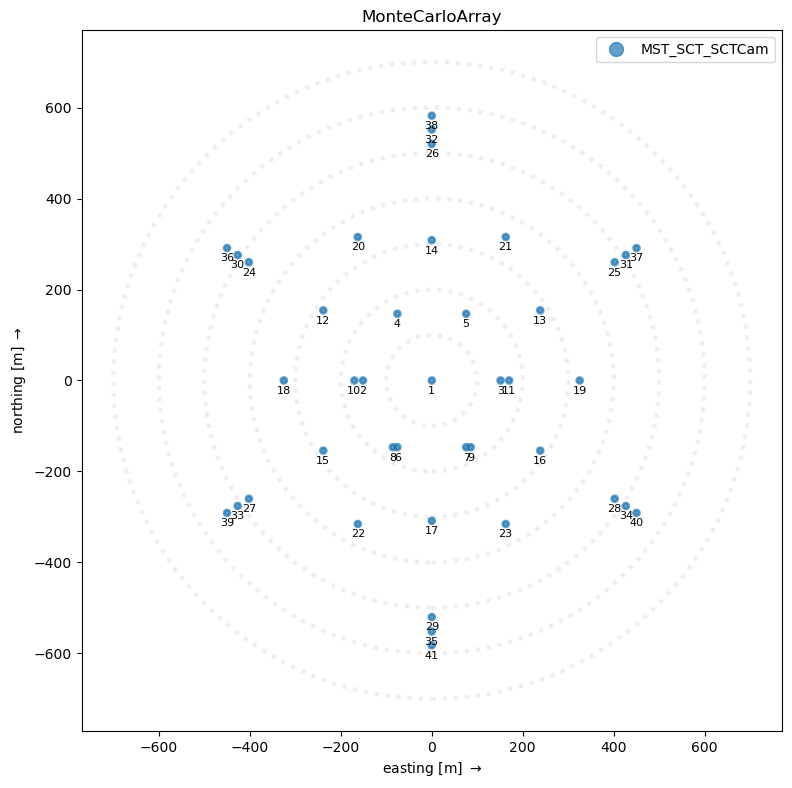

In [14]:
subarray.peek()

Can also display the information on a table.

In [15]:
subarray.to_table()

tel_id,name,type,pos_x,pos_y,pos_z,camera_name,optics_name,camera_index,optics_index,tel_description
,,,m,m,m,,,,,
int16,str3,str3,float32,float32,float32,str6,str3,int64,int64,str14
1,SCT,MST,0.0,0.0,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
2,SCT,MST,0.0,151.2,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
3,SCT,MST,0.0,-151.2,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
4,SCT,MST,146.65599,75.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
5,SCT,MST,146.65599,-75.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
6,SCT,MST,-146.65599,75.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
7,SCT,MST,-146.65599,-75.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam
8,SCT,MST,-146.65599,85.6,10.0,SCTCam,SCT,0,0,MST_SCT_SCTCam


When you loop through event from the EventSource object, it has the funny thing that it stores the last event in memory.

This is how you check which telescopes where triggered by this single event. The output corresponds to telescope indices.

In [16]:
event.trigger.tels_with_trigger

array([12, 20, 24, 30, 36], dtype=int16)

Let's access the information on telescope 20 which was triggered by this event. r0 corresponds to raw uncalibrated data in camera format. It contains the traces for every single pixel in the camera.

In [17]:
event.r0.tel[20]

ctapipe.containers.R0CameraContainer:
                      waveform: numpy array containing ADC samples(n_channels,
                                n_pixels, n_samples) with default None

Let's store it in a variable to look at it in more detail.

In [18]:
r0tel = event.r0.tel[20]

We are specifically dealing with the SCT camera. It only has 1 channel although there might be other telescopes with two channel or in other words, two gain modes (high or low voltage). The SCT camera has 11328 pixels and for prod3b the time window was set to 64 samples, 1 nanosecond each.

In [19]:
print(r0tel.waveform.shape)

(1, 11328, 64)


Displaying the traces in a 2D histogram.

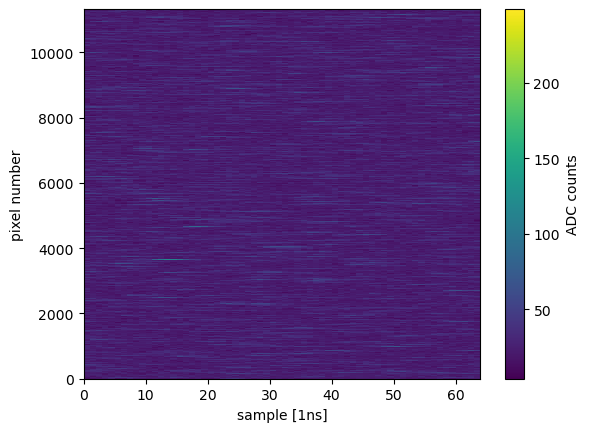

In [20]:
plt.pcolormesh(r0tel.waveform[0])
plt.colorbar(label='ADC counts')
plt.xlabel('sample [1ns]')
plt.ylabel('pixel number');

The following cells display a two pixels. One corresponds to the brightest pixel for this particular event that triggered this telescope and the other is a pixel that is far away from where the shower is contained.

In [21]:
# np.argmax returns the index of the highest value
# r0tel.waveform[0].sum(axis=1) returns the 11328 pixel values (1D-hist)
brightest_pixel = np.argmax(r0tel.waveform[0].sum(axis=1))

# r0tel.waveform[0,brightest_pixel] is looking at a single pixel over all time samples
print(r0tel.waveform[0,brightest_pixel].shape)

# r0tel.waveform[0,brightest_pixel].sum() sums over them
print(f"pixel {brightest_pixel} has sum {r0tel.waveform[0,brightest_pixel].sum()}")

(64,)
pixel 4632 has sum 2595


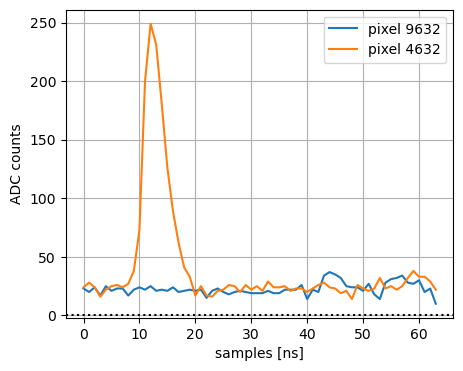

In [22]:
# Plots the trace of the brightest pixel
plt.figure(figsize=(5,4))
plt.plot(r0tel.waveform[0,brightest_pixel+5000], label = 'pixel {}'.format(brightest_pixel+5000))
plt.plot(r0tel.waveform[0,brightest_pixel], label ='pixel {}'.format(brightest_pixel))
plt.axhline(0, color='black', linestyle='dotted')
#plt.plot(r0tel.waveform[1,brightest_pixel], label="channel 1 (low-gain)")
plt.xlabel('samples [ns]')
plt.ylabel('ADC counts')
plt.grid()
plt.legend()

Now moving on to someting differet. Below is the class used to display information on the telescope camera.

In [23]:
from ctapipe.visualization import CameraDisplay

Let's save all the information of a single triggered telescope in a variable.

In [24]:
tel = subarray.tel[20]

To display the camera, we need to call the CameraDisplay class and provide it a geomtry. Here we are technically displaying the camera of SCT 20.

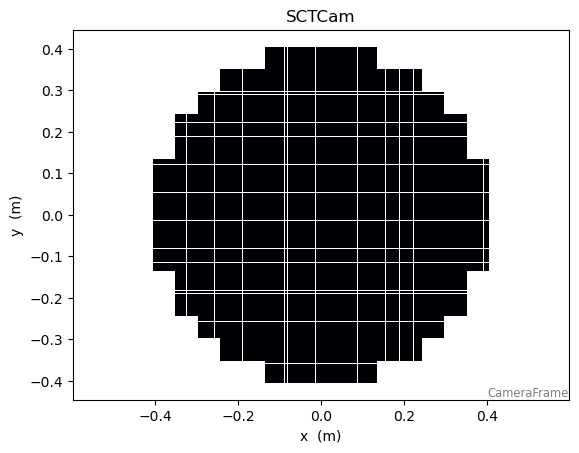

In [25]:
CameraDisplay(tel.camera.geometry)

Now we are going to display actual information. We will display the ADC counts value of each pixel at some specific time sample. Also notice the method to display a colorbar. It is matplotlib based so it will take the same arguments as the matplotlib object. In addition, you can specify the colormap as well and a title.

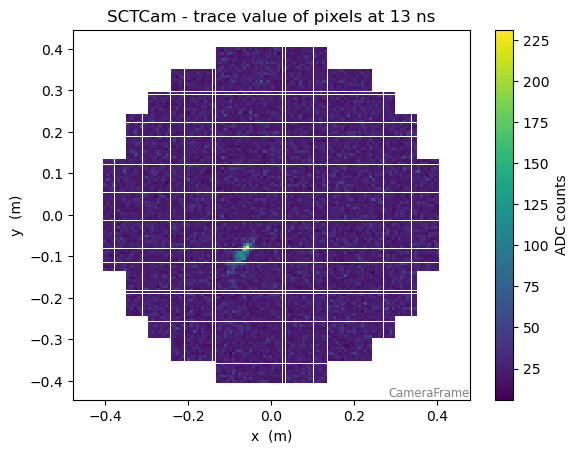

In [26]:
disp = CameraDisplay(tel.camera.geometry, cmap='viridis', title='SCTCam - trace value of pixels at 13 ns')
disp.image = r0tel.waveform[0,:,13]
disp.add_colorbar(label='ADC counts')

The following cells show you how to do an animation. This specific animation shows the shower image formation over time on the SCT camera. This code was slightly adapted from the one shown on the ctapipe documentation.

In [27]:
from matplotlib.animation import FuncAnimation
from IPython import display

In [28]:
fig, ax = plt.subplots(1, 1)
disp = CameraDisplay(tel.camera.geometry, ax=ax, cmap='viridis')
disp.add_colorbar(label='ADC counts')

__, ____, n_samples = r0tel.waveform.shape

def draw_sample(frame):
    ax.set_title(f"sample [1ns]: {frame}")
    disp.image = r0tel.waveform[0,:,frame]

anim = FuncAnimation(fig, func=draw_sample, frames=n_samples, interval=300)
#anim.save('basic_animation.mp4', fps=30)
plt.close(fig)
video = anim.to_html5_video()
display.display(display.HTML(video))


So far we have only worked with r0 level data. If we want to do trace integration, we need to calibrate the traces and do trace integration. To do that, we need the CameraCalibrator class.

In [29]:
from ctapipe.calib import CameraCalibrator

This class needs to take a subarray object in order for it to work.

In [30]:
calib = CameraCalibrator(subarray=subarray)
calib

apply_peak_time_shift,"[('type', '*', True)]","Apply peak time shift corrections. Apply the remaining absolute and fractional time shift corrections to the peak time after pulse extraction. If `apply_waveform_time_shift` is False, this will apply the full time shift. (default: traitlets.Undefined)"
apply_waveform_time_shift,"[('type', '*', False)]",Apply waveform time shift corrections. The minimal integer shift to synchronize waveforms is applied before peak extraction if this option is True. (default: traitlets.Undefined)
data_volume_reducer_type,NullDataVolumeReducer,"The name of a DataVolumeReducer subclass. Possible values: ['NullDataVolumeReducer', 'TailCutsDataVolumeReducer'] (default: NullDataVolumeReducer)"
image_extractor_type,"[('type', '*', 'NeighborPeakWindowSum')]","Name of the ImageExtractor subclass to be used. The name of a ImageExtractor subclass. Possible values: ['FullWaveformSum', 'FixedWindowSum', 'GlobalPeakWindowSum', 'LocalPeakWindowSum', 'SlidingWindowMaxSum', 'NeighborPeakWindowSum', 'TwoPassWindowSum', 'FlashCamExtractor', 'BaselineSubtractedNeighborPeakWindowSum'] (default: traitlets.Undefined)"
invalid_pixel_handler_type,NeighborAverage,Name of the InvalidPixelHandler to use. Possible values: ['NeighborAverage'] (default: NeighborAverage)


A little bit on data levels. 

r1: Raw data in common format, with preliminary calibration

dl0: raw archived data in common format, with optional zero suppression

dl1: processed data

The CameraCalibrator class performs the trace integration and creates the containers that contains information such as the integrated charge and arrival time (DL1) as well as a few others.

In [31]:
for event in EventSource(path, focal_length_choice='EQUIVALENT', back_seekable=True):
    calib(event) # fills in dl0, and dl1

Before calibration, although dl1 shows up if you call the event, it will be empty. After calibration, it is no long empty. Below you can see all the attributes that dl1 has. Every triggered telescope by the event will have the same attributes. 

In [32]:
event.dl1.tel

Map(ctapipe.containers.DL1CameraContainer, {12: ctapipe.containers.DL1CameraContainer:
                         image: Numpy array of camera image, after waveform
                                extraction.Shape: (n_pixel) with default None as
                                a 1-D array with dtype float32
                     peak_time: Numpy array containing position of the peak of
                                the pulse as determined by the extractor. Shape:
                                (n_pixel, ) with default None as a 1-D array
                                with dtype float32
                    image_mask: Boolean numpy array where True means the pixel
                                has passed cleaning. Shape: (n_pixel, ) with
                                default None as a 1-D array with dtype bool
                      is_valid: True if image extraction succeeded, False if
                                failed or in the case of TwoPass methods, that
                 

Let's store the dl1 level data for the same telescope that we were analyzing before. 

In [33]:
dl1tel = event.dl1.tel[20]

Now we will displace the integrated charge or display the event. The units at this point are in photoelectrons. Notice that you can also display individual pixels.

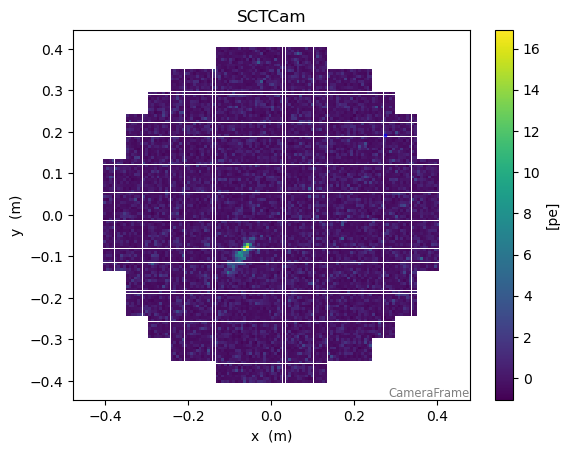

In [34]:
disp = CameraDisplay(tel.camera.geometry, image=dl1tel.image, cmap='viridis')
disp.add_colorbar(label='[pe]')
disp.highlight_pixels(4632, color='red')
disp.highlight_pixels(9632, color='blue')

We can also display the same image but as a function of time.

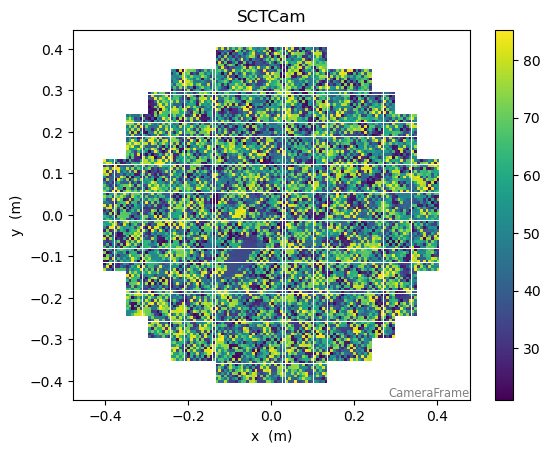

In [35]:
disp = CameraDisplay(tel.camera.geometry, image=dl1tel.peak_time, cmap='viridis')
disp.add_colorbar()

Notice that the display is not the best - we get a lot of lines going across the image likely due to the fine gridding that the SCT camera has.
It will be easier to view things by using the following method
It will turn the image into a 2D histogram.

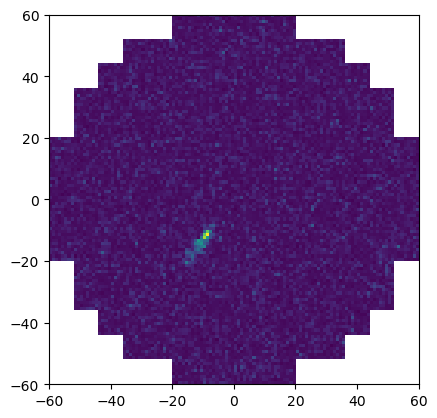

In [36]:
image_square = tel.camera.geometry.image_to_cartesian_representation(dl1tel.image)
centered_coords = [-image_square.shape[1]/2., image_square.shape[1]/2., -image_square.shape[0]/2., image_square.shape[0]/2. ]
plt.imshow(image_square, extent=centered_coords)

All of these ctapipe arrays can be manipulated as if they were numpy arrays (because they are).

Peak time histograms.

85.20474


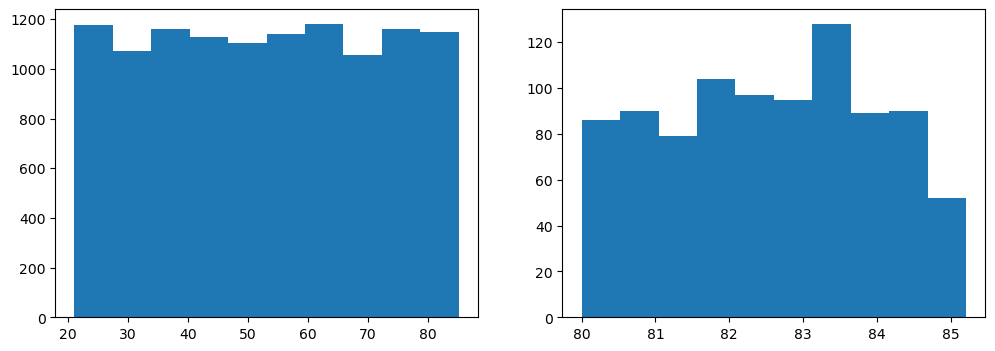

In [37]:
print(np.max(dl1tel.peak_time))
f, axs = plt.subplots(1,2,figsize=(12,4))
axs[0].hist(dl1tel.peak_time)
axs[1].hist(dl1tel.peak_time[dl1tel.peak_time>80]);

Displaying histogram counts for image.

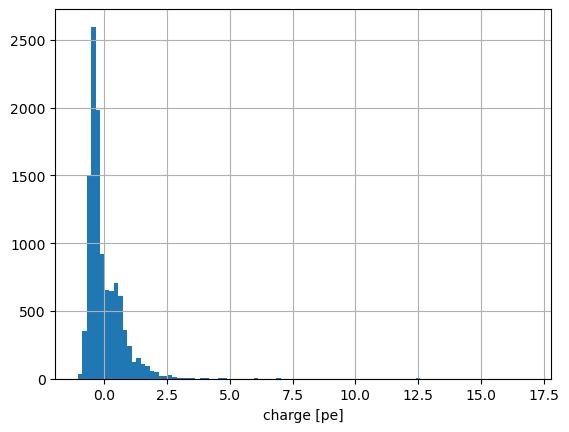

In [38]:
# Displaying histogram of counts for dl1 image
plt.hist(dl1tel.image, bins=100)
plt.xlabel('charge [pe]')
plt.grid();

ctapipe also has cleaning and hillas fitting functions. 

In [39]:
from ctapipe.image import hillas_parameters, tailcuts_clean, apply_time_delta_cleaning, mars_cleaning_1st_pass, dilate, fact_image_cleaning#, time_constrained_clean

To put these into practice, let's store in variables a shower image as well as it's timing information.

In [40]:
image = dl1tel.image
time = dl1tel.peak_time

Tailcuts is the 2 pass cleaing method. The syntax is as follows:

tailcuts_clean(geometry, image, image pixel, neighbor pixel)

image pixel is a factor that corresponds to threshold charge for image pixels at the first pass. 
neighbor pixel is also a charge threshold value for pixels that are neighbors to the image pixels or in other words, the pixels that survived the second pass.

tailcuts_clean returns an array of same of booleans that is of same size as the image (11328). Values that are True correspond to pixels that passed the cleaning.

In [41]:
mask = tailcuts_clean(tel.camera.geometry, image)
mask

array([False, False, False, ..., False, False, False])

We can add pixels to our cleaned image. Specifically adding pixels that are next to pixels that are the boundaries of the image. The cleaned area becomes larger. This process in ctapipe is called dilation.

In [42]:
dilated_mask = dilate(tel.camera.geometry,mask)

I wrote a function that does dilation N times.

In [43]:
from ctapipe_funcs import dilation

In [44]:
N_dilation = dilation(tel.camera.geometry,mask,N=5)

Displaying the mask without and with dilation done 5 times.

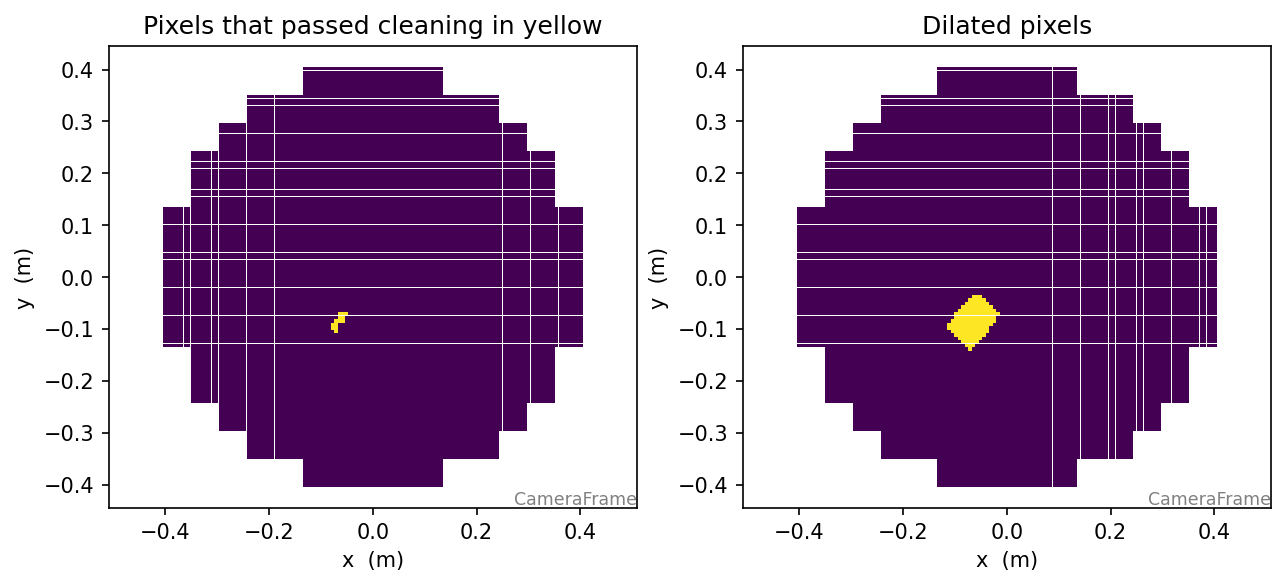

In [45]:
f, axs = plt.subplots(1, 2, figsize=(10,4),dpi=150)
CameraDisplay(tel.camera.geometry, title='Pixels that passed cleaning in yellow', image=mask, ax=axs[0], cmap='viridis')
CameraDisplay(tel.camera.geometry, title='Dilated pixels', image=N_dilation, ax=axs[1], cmap='viridis')

The cleaned image is given by the image array with only the pixels
that passed the cleaning algorithm. All the pixels that did not pass the cleaning are set to zero.

In [46]:
cleaned = image.copy()
cleaned_dilated = image.copy()

cleaned[~mask] = 0
cleaned_dilated[~N_dilation]=0

Displaying the cleaned images without/with dilation.

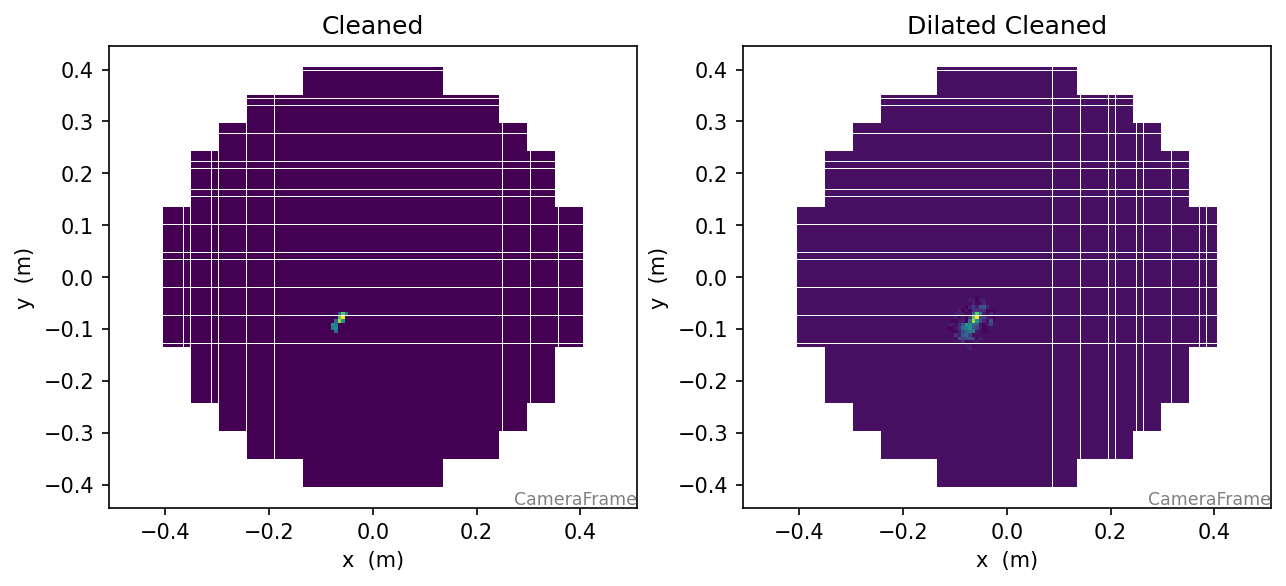

In [47]:
f, axs = plt.subplots(1, 2, figsize=(10,4),dpi=150)
CameraDisplay(tel.camera.geometry, image=cleaned, title='Cleaned', ax=axs[0], cmap='viridis')
CameraDisplay(tel.camera.geometry, image=cleaned_dilated, title='Dilated Cleaned', ax=axs[1], cmap='viridis')

Zooming in into the area that contains the surviving pixels...

(-0.15, -0.05)

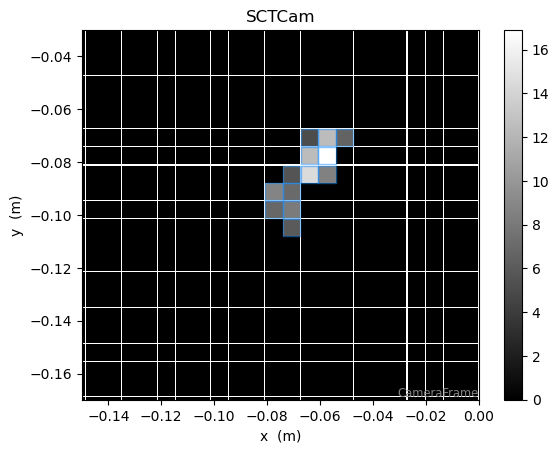

In [48]:
disp = CameraDisplay(tel.camera.geometry, image=cleaned, cmap='gray')
disp.highlight_pixels(mask, alpha=0.5, color="dodgerblue")
disp.add_colorbar()
plt.xlim(-0.15,0.0)
plt.ylim(-0.15,-0.05)

Hillas parameters are acquired by calling the hillas_parameters function
on the cleaned image.

In [49]:
params = hillas_parameters(tel.camera.geometry, cleaned)
print(params)

{'intensity': 118.77458763122559,
 'kurtosis': 1.8543095515608736,
 'length': <Quantity 0.01190331 m>,
 'length_uncertainty': <Quantity 0.00050476 m>,
 'phi': <Angle -2.22740464 rad>,
 'psi': <Angle 0.95492895 rad>,
 'r': <Quantity 0.10553764 m>,
 'skewness': -0.3059273537035427,
 'width': <Quantity 0.0039154 m>,
 'width_uncertainty': <Quantity 0.00019501 m>,
 'x': <Quantity -0.06442375 m>,
 'y': <Quantity -0.0835929 m>}


Now we can display the cleaned image with Hillas parameters overlayed as follows:

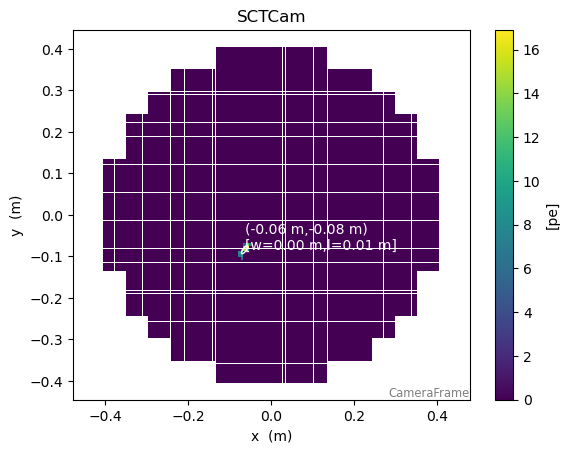

In [50]:
disp = CameraDisplay(tel.camera.geometry, image=cleaned, cmap='viridis')
disp.add_colorbar(label='[pe]')
disp.overlay_moments(params, color='white', lw=1)

Below we display the whole cleaning process. It is also an example of how to display multiple ctapipe images.

<bound method Figure.set_tight_layout of <Figure size 1800x1000 with 8 Axes>>

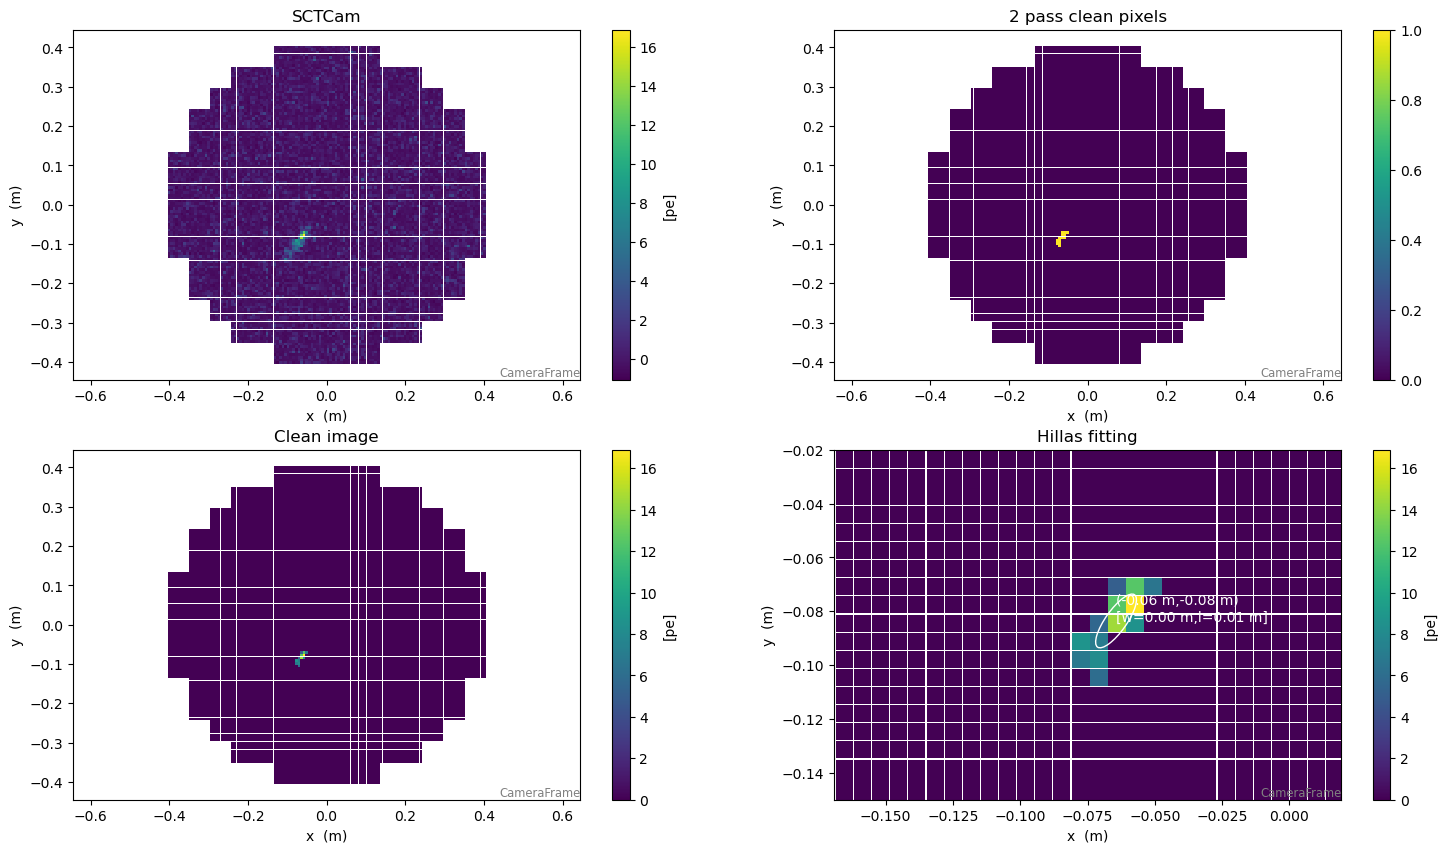

In [51]:
# Displaying the cleaning process
f, axs = plt.subplots(2, 2, figsize=(18,10))

disp1 = CameraDisplay(tel.camera.geometry, image=dl1tel.image, ax=axs[0][0],cmap='viridis')
disp1.add_colorbar(label=r'[pe]')

disp2 = CameraDisplay(tel.camera.geometry, image=mask, ax=axs[0][1], title='2 pass clean pixels', cmap='viridis')
disp2.add_colorbar()

disp3 = CameraDisplay(tel.camera.geometry, image=cleaned, ax=axs[1][0], title='Clean image', cmap='viridis')
disp3.add_colorbar(label=r'[pe]')

disp4 = CameraDisplay(tel.camera.geometry, image=cleaned, ax=axs[1][1], title='Hillas fitting', cmap='viridis')
disp4.add_colorbar(label=r'[pe]')
disp4.overlay_moments(params,color='white',lw=1)
axs[1][1].set_xlim(-0.15,0.0)
axs[1][1].set_ylim(-0.15,-0.02)

f.set_tight_layout

The cell above might be a bit too much code but you can get crafty when it comes to displaying multiple images to minimize the lines of code you have and perhaps make it more efficent. For instance, look at the example below:

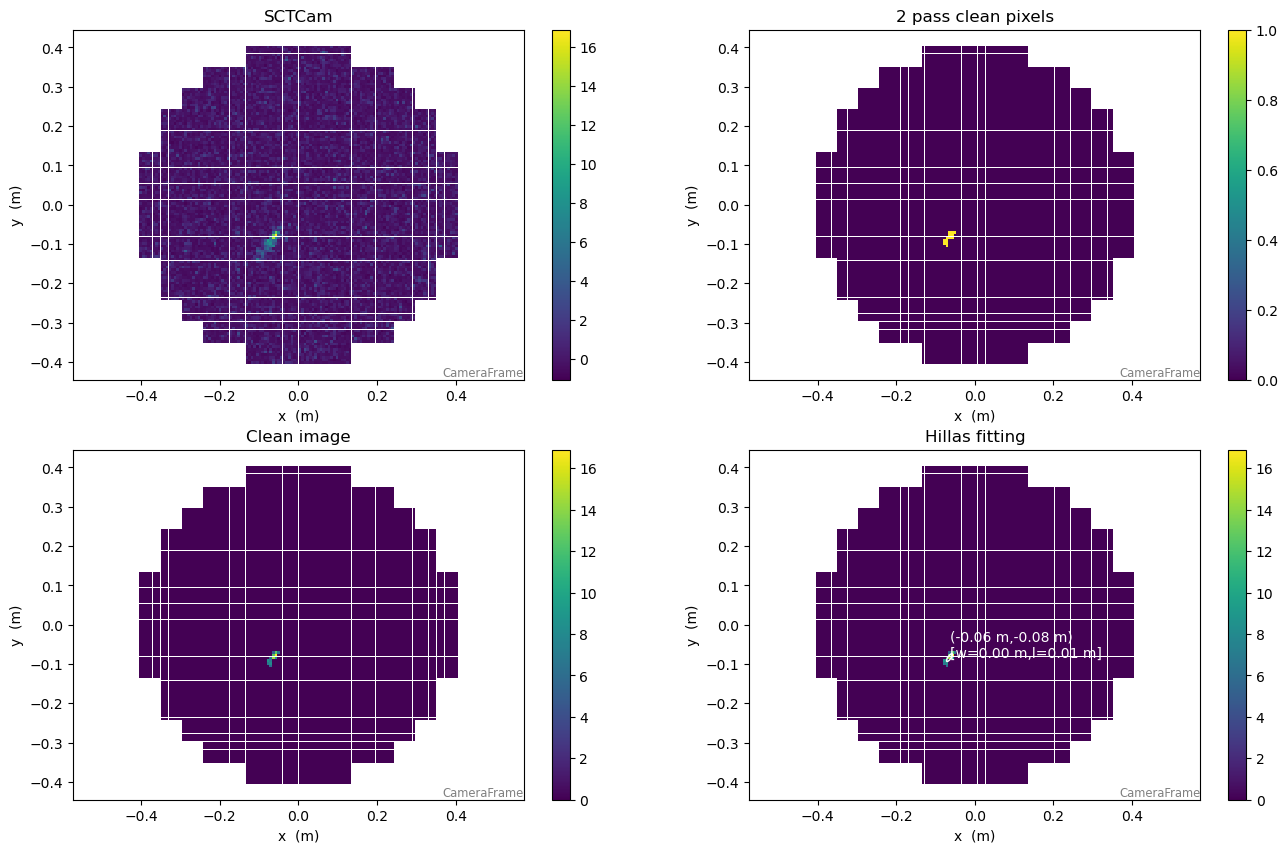

In [52]:
images_to_display = [dl1tel.image, mask, cleaned, cleaned]
plot_titles = ['SCTCam', '2 pass clean pixels', 'Clean image', 'Hillas fitting']

f, axs = plt.subplots(2, 2, figsize=(16,10))

counter = 0
for images, ax, title in zip(images_to_display, axs.flatten(), plot_titles):
    disp = CameraDisplay(tel.camera.geometry,image=images, ax=ax, cmap='viridis')
    disp.add_colorbar()
    ax.set_title(title)
    counter+=1
    if counter == 4:
        disp.overlay_moments(params, color='white', lw=1)

The cells below display the different cleaning methods. There is 3 pass cleaning method from Magic, the FACT cleaning method and a time based cleaning method.

In [53]:
# 3 pass
mask_3pass = mars_cleaning_1st_pass(tel.camera.geometry, image, 4, 2, min_number_picture_neighbors=2)
# fact
mask_fact = fact_image_cleaning(tel.camera.geometry, image, arrival_times=time)
# time constrained
#mask_time_constrained = time_constrained_clean(tel.camera.geomtry, image, arrival_times=time)
# time delta cleaning
mask_time_delta_clean = apply_time_delta_cleaning(tel.camera.geometry, mask=mask, arrival_times=time, min_number_neighbors=1, time_limit=5)

In [54]:
# newly cleaned images
image_3pass = image.copy()
image_3pass[~mask_3pass]=0
image_fact = image.copy()
image_fact[~mask_fact]=0
#image_time_constrained = image.copy()
#image_time_constrained[~mask_time_constrained]=0
image_time_delta_clean = image.copy()
image_time_delta_clean[~mask_time_delta_clean]=0

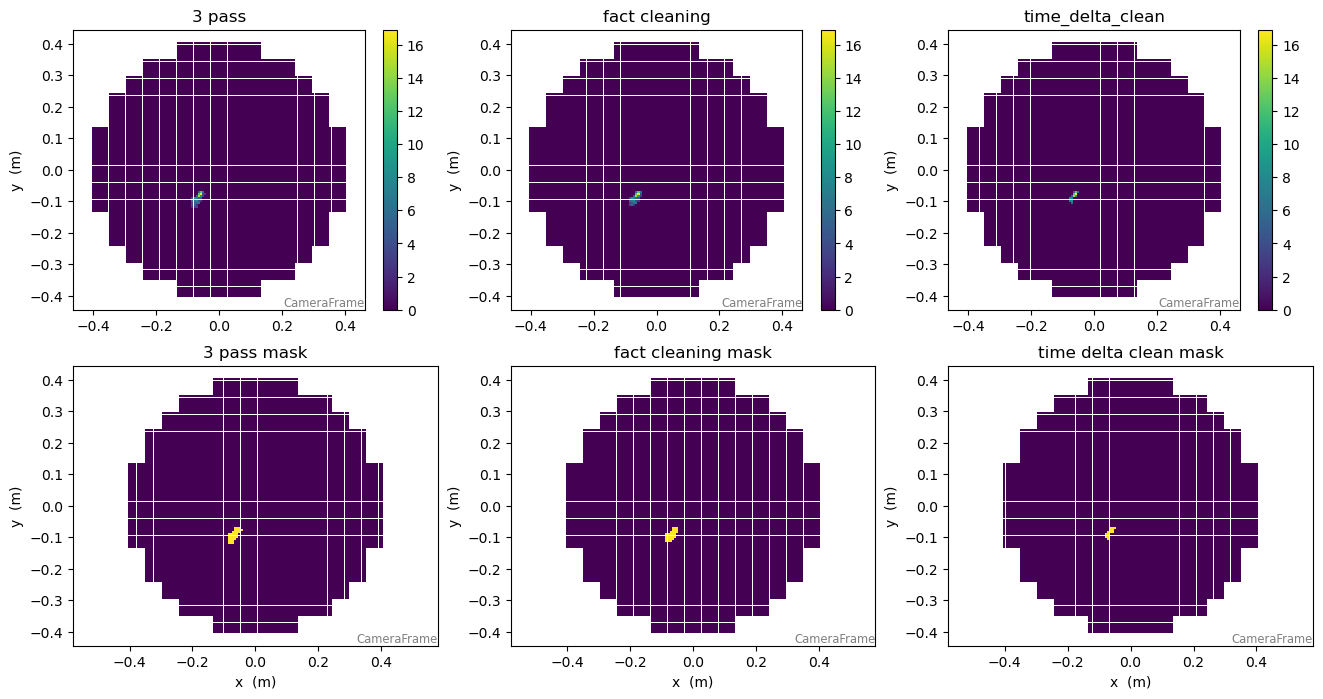

In [55]:
# Displaying the different cleaning methods
to_display = [image_3pass, image_fact, image_time_delta_clean, mask_3pass, mask_fact, mask_time_delta_clean]
titles = ['3 pass', 'fact cleaning', 'time_delta_clean', '3 pass mask', 'fact cleaning mask', 'time delta clean mask']

f, axs = plt.subplots(2, 3, figsize=(16,8))
cumulative = 0
for images, ax, title in zip(to_display, axs.flatten(), titles):
    disp = CameraDisplay(tel.camera.geometry,image=images, ax=ax, cmap='viridis')
    if cumulative < 3:
        disp.add_colorbar()
        ax.set_xlabel('')
    ax.set_title(title)
    cumulative +=1

Exploring dilation. Here is an example of what is possible.

In [56]:
dilate1 = dilation(tel.camera.geometry,mask,N=2)
dilate2 = dilation(tel.camera.geometry,mask,N=4)
dilate3 = dilation(tel.camera.geometry,mask,N=6)
dilate4 = dilation(tel.camera.geometry,mask,N=8)
dilate5 = dilation(tel.camera.geometry,mask,N=10)

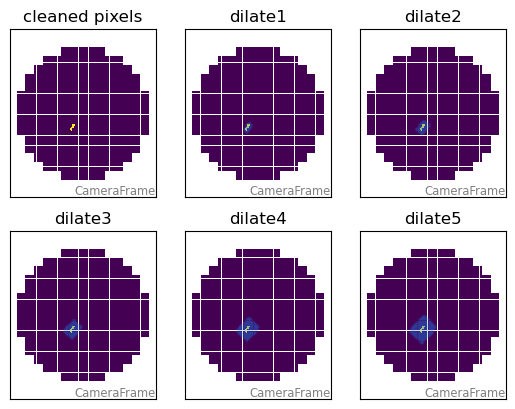

In [57]:
# Plotting dilation example.
to_display = [mask,dilate1,dilate2,
              dilate3,dilate4,dilate5,]
titles = ['cleaned pixels', 'dilate1','dilate2',
          'dilate3','dilate4','dilate5', ]
counter = 0
f, axs = plt.subplots(2, 3,)
for images, ax, title in zip(to_display, axs.flatten(), titles):
    disp = CameraDisplay(tel.camera.geometry,image=mask, ax=ax, cmap='viridis')
    ax.set_title(title)

    ax.xaxis.set_tick_params(labelbottom=False)
    ax.yaxis.set_tick_params(labelleft=False)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Hide X and Y axes tick marks
    ax.set_xticks([])
    ax.set_yticks([])
    if counter >=1 :
        disp.highlight_pixels(images, color='dodgerblue', alpha=0.1)
    counter+=1
fig.tight_layout()

Here is another function that might be useful. If we want to find an event that is between 10-15 TeV we can call the function below. 

In [58]:
from displaying import disp_event

The function takes a simulation file as well as the energy threshold of the event you want to display. By default it will display all the telescopes that were triggered by the event.

Out of the events (energies) printed out, it will only store the last event in memory. 
If you wanted to select one specific event, set more stringent energy bounds. 
These are the events within 10 to 15 TeV energy range:
13.727301597595215 TeV
13.727301597595215 TeV


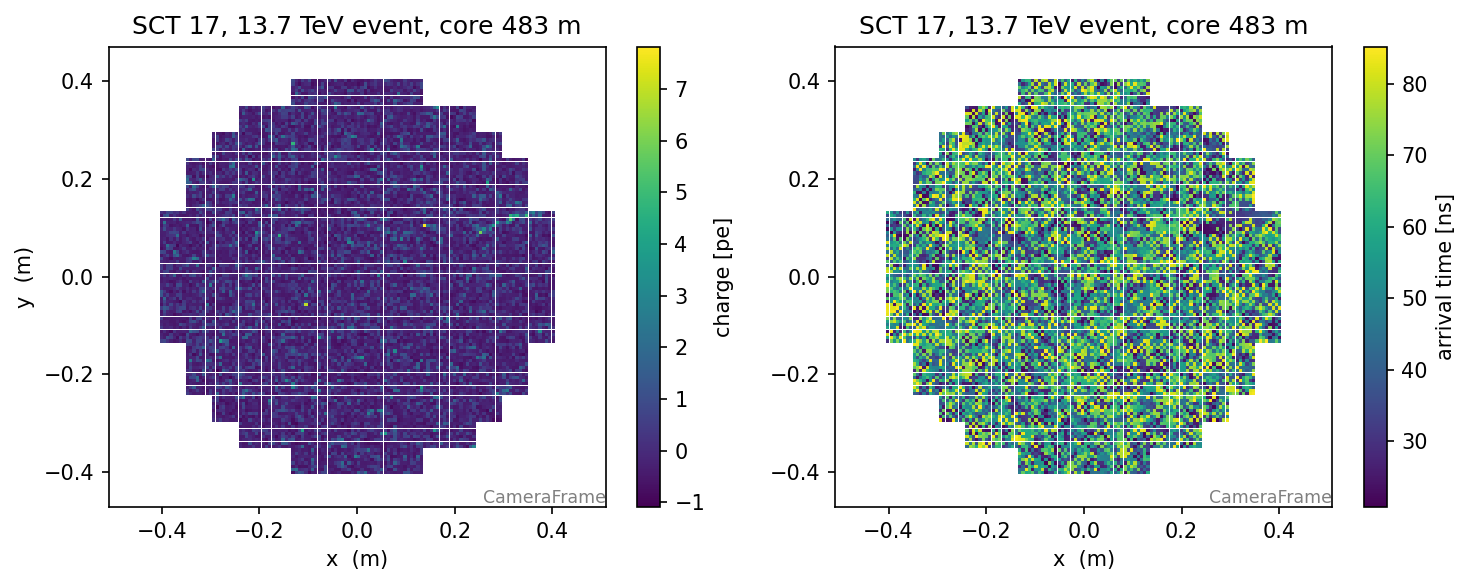

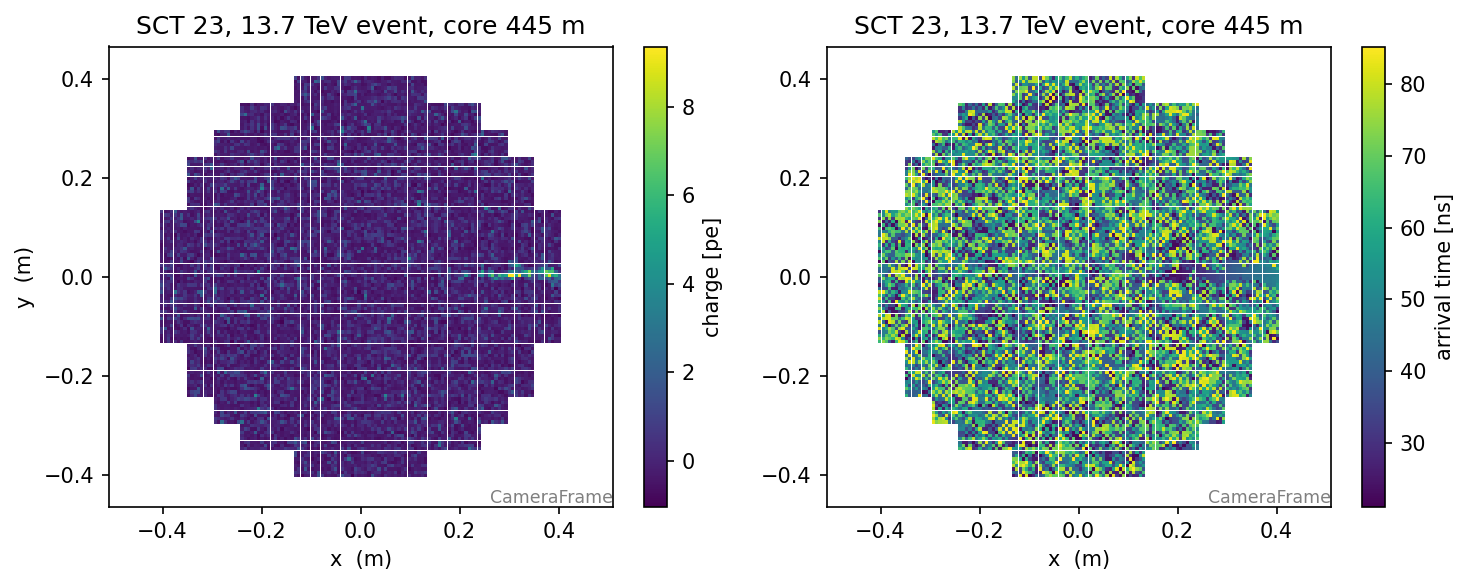

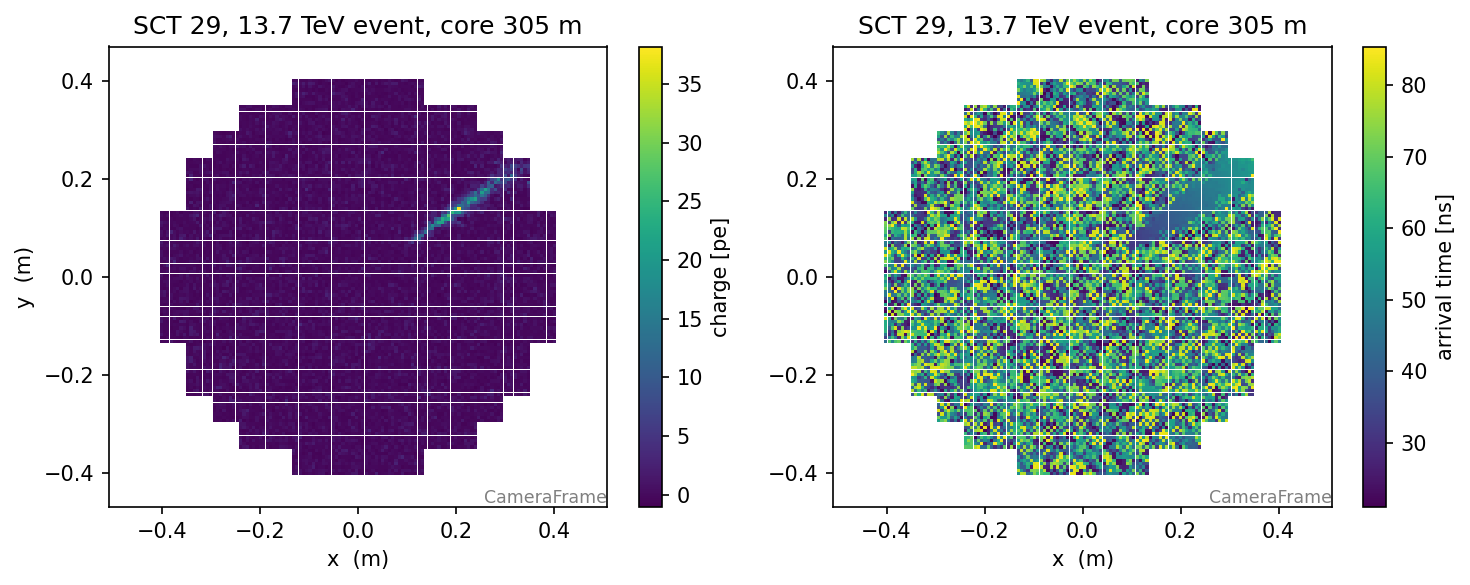

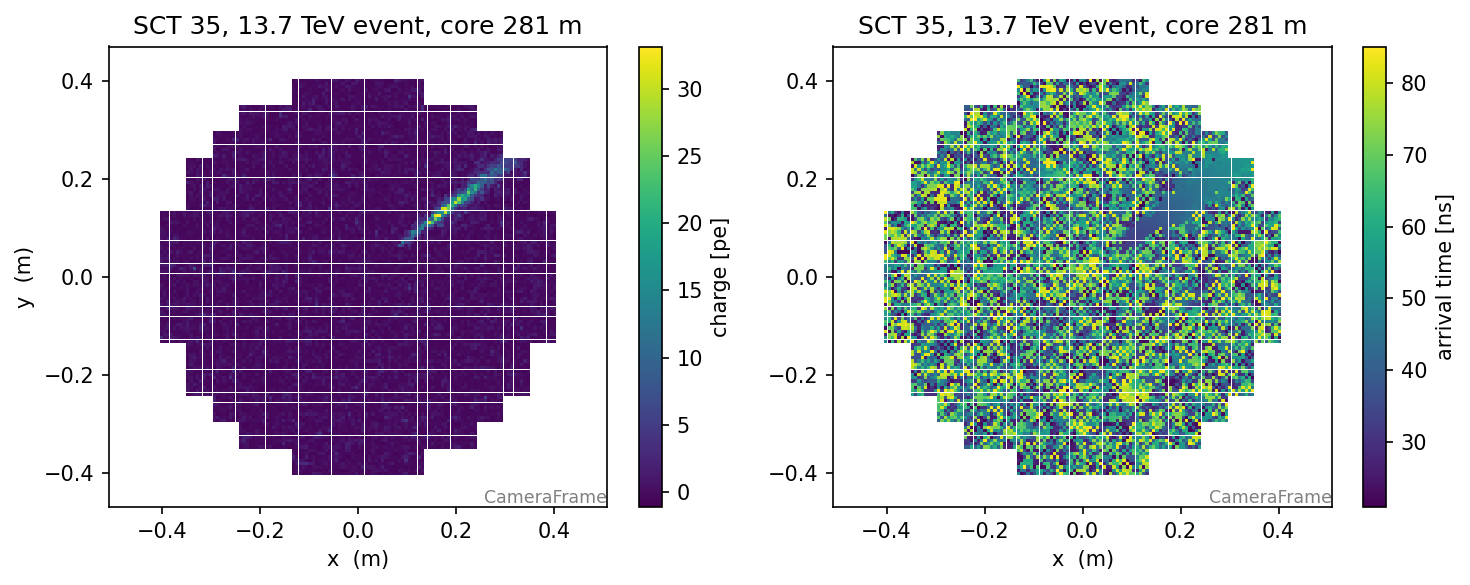

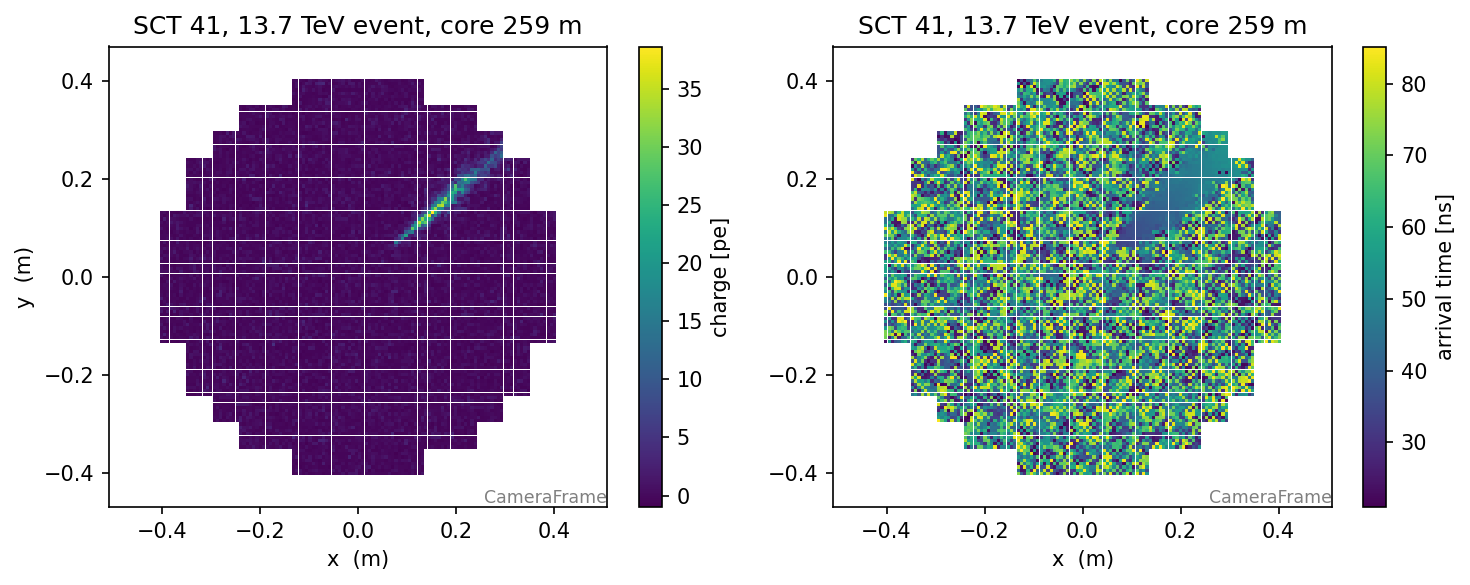

In [59]:
disp_event(path, 10, 15)